In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

hand_keypoints = pd.read_csv( "/content/drive/My Drive/unrounded_csv.csv")

d = np.load( "/content/drive/My Drive/data.npz",allow_pickle=True)
dataset = d[ 'arr_0' ]

x_train, x_test, y_train, y_test = train_test_split( dataset , hand_keypoints , test_size=0.3 )

np.save( "/content/drive/My Drive/shreya1/x_train.npy" , x_train )
np.save( "/content/drive/My Drive/shreya1/y_train.npy" , y_train )
np.save( "/content/drive/My Drive/shreya1/x_test.npy" , x_test )
np.save( "/content/drive/My Drive/shreya1/y_test.npy" , y_test )

Using TensorFlow backend.


In [0]:
x_train = np.load( "/content/drive/My Drive/shreya1/x_train.npy") / 255
y_train = np.load("/content/drive/My Drive/shreya1/y_train.npy" )
x_test = np.load( "/content/drive/My Drive/shreya1/x_test.npy" ) / 255
y_test = np.load( "/content/drive/My Drive/shreya1/y_test.npy" ) 



In [0]:
for q in range(0,79):
        if q%2!=0 :
            y_train[:,q]=y_train[:,q]/48
            y_test[:,q]=y_test[:,q]/48       
        elif q%2==0:
            y_train[:,q]=y_train[:,q]/64
            y_test[:,q]=y_test[:,q]/64

In [0]:
y_train = np.reshape( y_train , ( -1 , 1 , 1 , 80 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 80 ))

In [13]:
model_layers = [ 
    tf.keras.layers.Conv2D( 128 , input_shape=( 48 , 64 , 3 ) , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
  #  tf.keras.layers.BatchNormalization(),

   # tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 4 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 4 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 4 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 4) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
   # tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 1 , 5 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( 80 , kernel_size=( 1 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 80 , kernel_size=( 1 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 80 , kernel_size=( 1 , 1 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 80 , kernel_size=( 1 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 80 , kernel_size=( 1 , 1 ) , strides=1 , activation='sigmoid' ),

]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 46, 62, 128)       3584      
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 44, 60, 128)       147584    
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 42, 58, 128)       147584    
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 40, 56, 128)       147584    
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 38, 54, 128)       147584    
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 36, 52, 128)       147584    
_________________________________________________________________
batch_normalization_21 (Batc (None, 36, 52, 128)      

In [0]:
model.fit( x_train , y_train , epochs=1000 , batch_size=50 , validation_data=( x_test , y_test ) )

Epoch 1/1000
151/151 [==============================] - 17s 114ms/step - loss: 3.6679 - mse: 3.6679 - val_loss: 3.6430 - val_mse: 3.6430
Epoch 2/1000
151/151 [==============================] - 16s 103ms/step - loss: 3.5800 - mse: 3.5800 - val_loss: 3.5900 - val_mse: 3.5900
Epoch 3/1000
151/151 [==============================] - 15s 103ms/step - loss: 3.5774 - mse: 3.5774 - val_loss: 3.5866 - val_mse: 3.5866
Epoch 4/1000
151/151 [==============================] - 15s 102ms/step - loss: 3.5767 - mse: 3.5767 - val_loss: 3.5859 - val_mse: 3.5859
Epoch 5/1000
151/151 [==============================] - 15s 102ms/step - loss: 3.5758 - mse: 3.5758 - val_loss: 3.5837 - val_mse: 3.5837
Epoch 6/1000
151/151 [==============================] - 15s 102ms/step - loss: 3.5739 - mse: 3.5739 - val_loss: 3.5824 - val_mse: 3.5824
Epoch 7/1000
151/151 [==============================] - 15s 102ms/step - loss: 3.5712 - mse: 3.5712 - val_loss: 3.5838 - val_mse: 3.5838
Epoch 8/1000
151/151 [===================

In [0]:
#model.save("/content/drive/My Drive/shreya1/model_1000")
from tensorflow import keras
model = keras.models.load_model("/content/drive/My Drive/shreya1/model_1000")

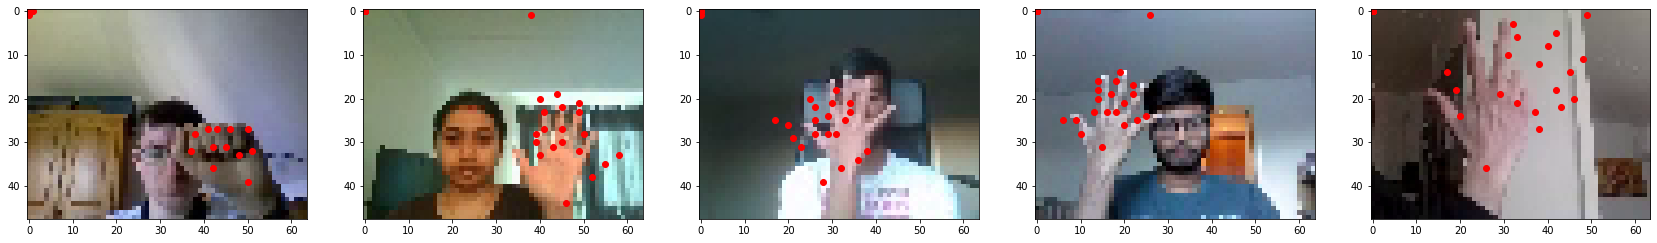

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.figure(figsize=( 300 , 300 ))
for i in range( 43 , 48):
   # sample_image = ( x_test[i] * 255  , ( 48 , 64 ) ).astype( np.uint8 )
    sample_image = ( x_test[i]*255 ).astype( np.uint8 )
#    img = Imae.fromarray(sample_image,'RGB')
    pred = model.predict( x_test[ i : i +1  ] ) 
    for q in range(0,79):
        if q%2!=0 :
            pred[:,:,:,q]=pred[:,:,:,q]*48
        elif q%2==0:
            pred[:,:,:,q]=pred[:,:,:,q]*64
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 40 , 2 ) )
    fig.add_subplot( 1 , 50 , i )
    plt.imshow( sample_image , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='red' )
plt.show()

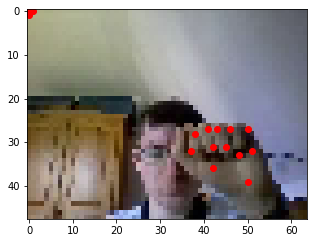

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.figure(figsize=( 300 , 300 ))
i=43
   # sample_image = ( x_test[i] * 255  , ( 48 , 64 ) ).astype( np.uint8 )
sample_image = ( x_test[i]*255 ).astype( np.uint8 )
#    img = Imae.fromarray(sample_image,'RGB')
pred = model.predict( x_test[ i : i +1  ] ) 
for q in range(0,79):
  if q%2!=0 :
    pred[:,:,:,q]=pred[:,:,:,q]*48
  elif q%2==0:
    pred[:,:,:,q]=pred[:,:,:,q]*64
pred = pred.astype( np.int32 )
pred = np.reshape( pred[0 , 0 , 0 ] , ( 40 , 2 ) )
fig.add_subplot( 1 , 50 , i )
plt.imshow( sample_image , cmap='gray' )
plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='red' )
plt.show()

<IPython.core.display.Javascript object>

Saved to photo.jpg


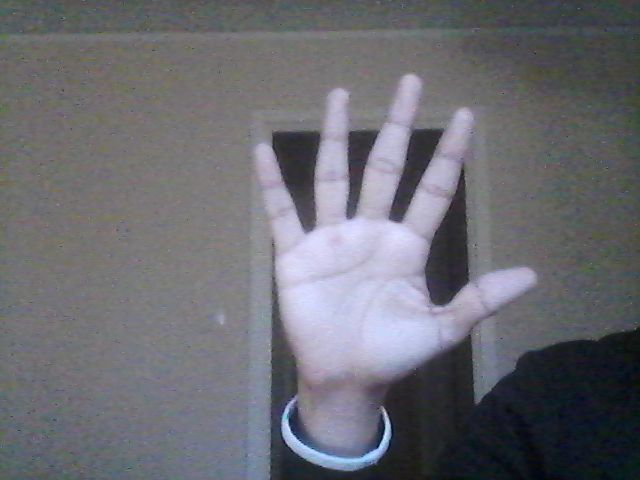

In [0]:

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [0]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open( "photo.jpg")
image=np.asarray( image ) 
image_arr=cv2.resize(image,(48,64))
#image_arr = np.reshape( image_arr , ( -1 , 48 , 64 , 3 ) )
image_arrr = (image_arr ).astype( np.uint8 )

pred = model.predict(image_arr)
for q in range(0,79):
        if q%2!=0 :
            pred[:,:,:,q]=pred[:,:,:,q]*48
        elif q%2==0:
            pred[:,:,:,q]=pred[:,:,:,q]*64
pred = pred.astype( np.int32 )
pred = np.reshape( pred[0 , 0 , 0 ] , ( 40 , 2 ) )

plt.imshow( image_arrr , cmap='gray' )
plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
plt.show()


ValueError: ignored

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


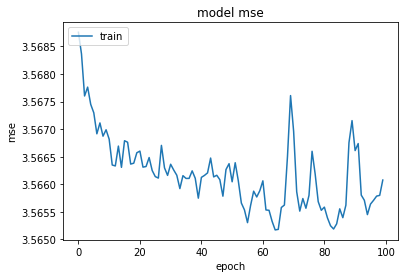

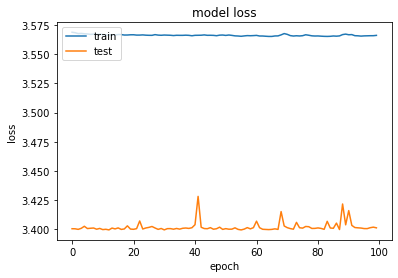

In [0]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
#history = model.fit( x_train , y_train , epochs=100 , batch_size=50 , validation_data=( x_test , y_test ) )
print(history.history.keys())
# summarize history for mse
plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_accuracy'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()